### 1. Importing Relevant Libraries

In [44]:
import pandas as pd
from datetime import datetime
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

### 2. Importing Dataset
Link to Melbourne Dataset: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data

In [45]:
housing_data = pd.read_csv('melb_data.csv')

housing_data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [46]:
housing_data.shape

(13580, 21)

Q1.1 The dataframe consists of 13,580 rows and 21 columns

In [10]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Q1.2 From the above table, we can see that the average land size of all properties is 13,580 m2

In [18]:
# Sort the house prices based on year built
housing_data.sort_values(by='YearBuilt', ascending=False).head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1234,Brighton East,8 Thomas St,2,h,1310000.0,S,Buxton,24/09/2016,10.7,3187.0,...,3.0,2.0,302.0,250.0,2018.0,Glen Eira,-37.91820,145.02310,Southern Metropolitan,6938.0
11136,Newport,50 Peel St,3,h,1195000.0,SP,Williams,12/08/2017,6.2,3015.0,...,2.0,2.0,358.0,NaN,2017.0,Hobsons Bay,-37.84586,144.88948,Western Metropolitan,5498.0
7060,Heidelberg,36 Buckingham Dr,3,h,1030000.0,S,Miles,30/07/2016,10.6,3084.0,...,3.0,2.0,649.0,357.0,2017.0,Banyule,-37.75010,145.08220,Eastern Metropolitan,2890.0
8134,Newport,17 Gordon St,3,t,900000.0,S,Greg,13/05/2017,8.4,3015.0,...,2.0,2.0,575.0,128.0,2017.0,Hobsons Bay,-37.83890,144.86660,Western Metropolitan,5498.0
11157,Pascoe Vale,17 Valerie St,3,h,1114000.0,S,Brad,12/08/2017,8.5,3044.0,...,2.0,2.0,256.0,190.0,2017.0,Moreland,-37.72034,144.93788,Northern Metropolitan,7485.0


Q1.3 Based on the recent listed date, the newest home price is USD 1,310,000

In [17]:
# Find the number of missing values in each column
missing_values = housing_data.isnull().sum()
missing_values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Q1.4 There were several missing values in the following columns:  
Car                62  
BuildingArea     6450  
YearBuilt        5375  
CouncilArea      1369  

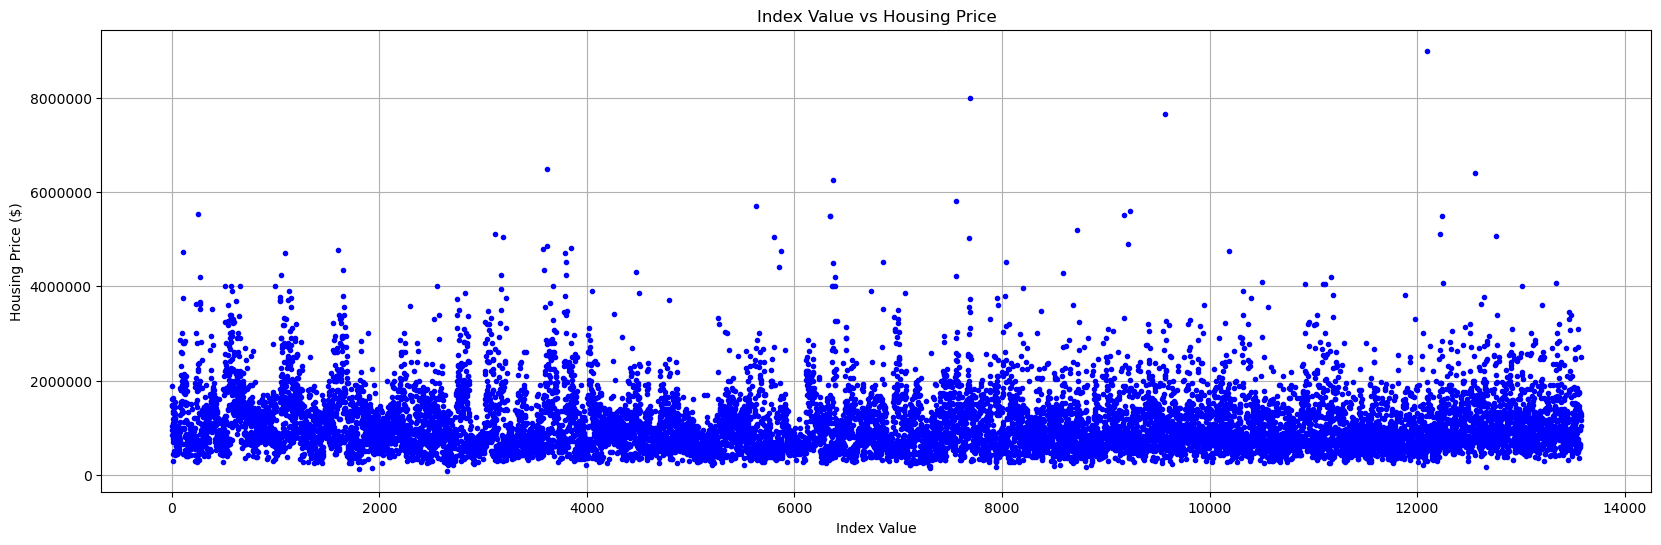

In [27]:
# Plot the index value versus price for the 13,580 entries.
index_values = housing_data.index
housing_prices = housing_data['Price']

# Plot in a scatter plot
plt.figure(figsize=(20, 6))
plt.plot(index_values, housing_prices, marker='o', linestyle='', color='b', markersize=3)  
plt.title('Index Value vs Housing Price')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()




Q1.5 What is a pandas dataframe? What is an index value?

### 3. Cleaning the Data

In [40]:
# Drop the rows with missing values
housing_data = housing_data.dropna()
housing_data.reset_index(drop=True, inplace=True) # Reset the index
housing_data.isnull().sum() # Check if there are still missing values

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [43]:
# Check the new entries for cleaned data
housing_data.shape

(6196, 21)

Q1.6 The cleaned dataset now only has 6,196 rows from previously 13,580 rows

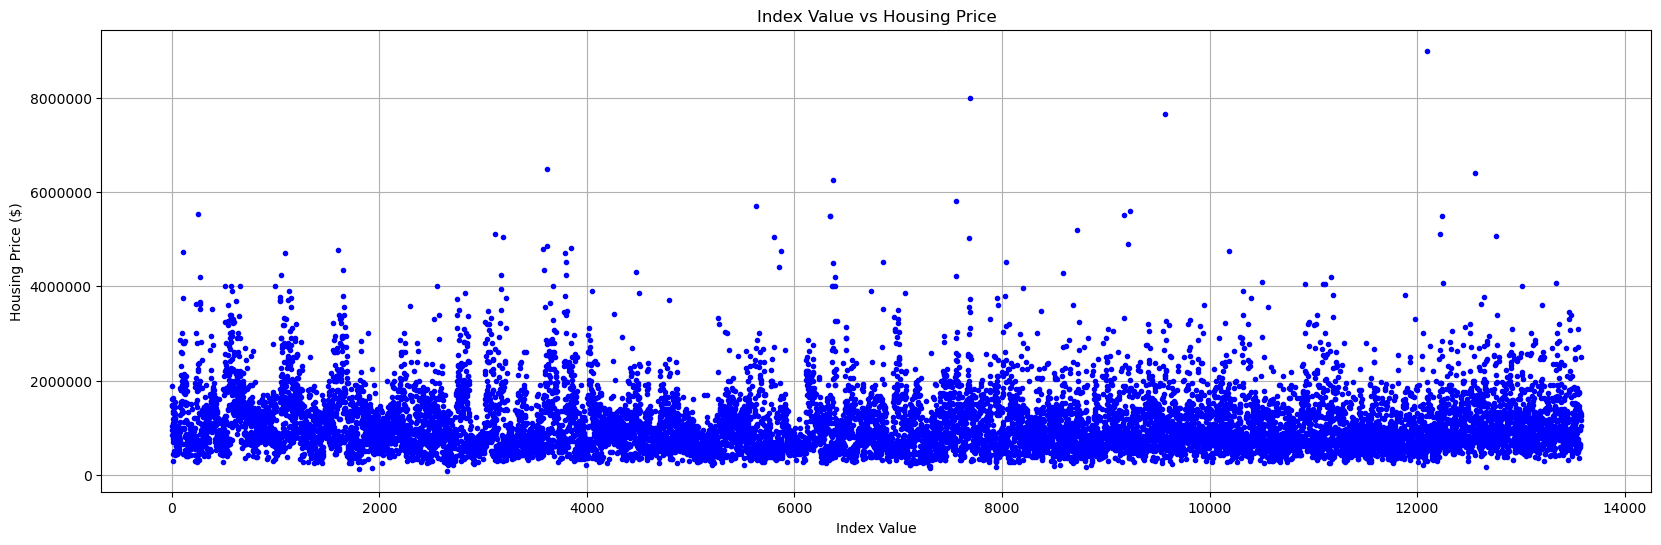

In [47]:
# Plot the index value versus price for the cleaned data
index_values = housing_data.index
housing_prices = housing_data['Price']

# Plot in a scatter plot
plt.figure(figsize=(20, 6))
plt.plot(index_values, housing_prices, marker='o', linestyle='', color='b', markersize=3)
plt.title('Index Value vs Housing Price')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()

### 4. Build Machine Learning Model